In [208]:
%matplotlib inline
import pandas as pd
import mplfinance as mpf
import quandl
import matplotlib.pyplot as plt
import numpy as np

In [209]:
#Fetching Time Specific Data
quandl.ApiConfig.api_key = 'bwnFc2yx21NhsHDdzUAL'
df_grib = quandl.get('BSE/BOM500325', start_date='2019-01-01', end_date='2020-09-15')

In [210]:
df_grib.tail()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
2020-09-09,2085.00,2167.2,2085.00,2161.25,2140.04,850676.0,38623.0,1.820479e+09,312223.0,36.70,82.20,76.25
2020-09-10,2185.00,2343.9,2176.15,2314.65,2277.88,2449702.0,98665.0,5.580139e+09,611376.0,24.96,167.75,129.65
2020-09-11,2314.65,2337.0,2286.05,2318.85,2318.47,1330635.0,58453.0,3.085034e+09,379174.0,28.50,50.95,4.20
2020-09-14,2319.75,2360.0,2281.95,2302.35,2322.60,619976.0,27379.0,1.439953e+09,78561.0,12.67,78.05,-17.40
2020-09-15,2315.00,2326.5,2288.20,2317.90,2308.14,509141.0,21105.0,1.175166e+09,148557.0,29.18,38.30,2.90


In [211]:
df_grib.columns

Index(['Open', 'High', 'Low', 'Close', 'WAP', 'No. of Shares', 'No. of Trades',
       'Total Turnover', 'Deliverable Quantity', '% Deli. Qty to Traded Qty',
       'Spread H-L', 'Spread C-O'],
      dtype='object')

In [212]:
df_grib['High'].rolling(13).mean()

Date
2019-01-01            NaN
2019-01-02            NaN
2019-01-03            NaN
2019-01-04            NaN
2019-01-07            NaN
                 ...     
2020-09-09    2130.803846
2020-09-10    2149.207692
2020-09-11    2166.569231
2020-09-14    2182.942308
2020-09-15    2196.634615
Name: High, Length: 423, dtype: float64

In [213]:
df_grib['Close'].rolling(5).mean()

Date
2019-01-01        NaN
2019-01-02        NaN
2019-01-03        NaN
2019-01-04        NaN
2019-01-07    1104.38
               ...   
2020-09-09    2108.05
2020-09-10    2148.55
2020-09-11    2196.84
2020-09-14    2240.83
2020-09-15    2283.00
Name: Close, Length: 423, dtype: float64

In [214]:
#create simple moving average
df = pd.DataFrame()
df['Close'] = df_grib['Close']
df['High_MVA'] = df_grib['High'].rolling(window = 13).mean()
df['Close_MVA'] = df_grib['Close'].rolling(window = 5).mean()

In [215]:
df.sample(10)

,Close,High_MVA,Close_MVA
Date,,,
2019-08-13,1275.00,1201.896154,1165.19
2020-08-19,2133.20,2146.546154,2115.96
2019-06-24,1262.65,1317.646154,1279.76
2020-02-18,1466.10,1460.026923,1475.02
2019-02-06,1309.85,1258.092308,1273.14
2019-10-14,1357.65,1328.946154,1341.60
2019-06-17,1281.50,1340.119231,1316.48
2020-06-11,1537.50,1542.542308,1559.45
2019-12-18,1575.70,1582.753846,1570.87


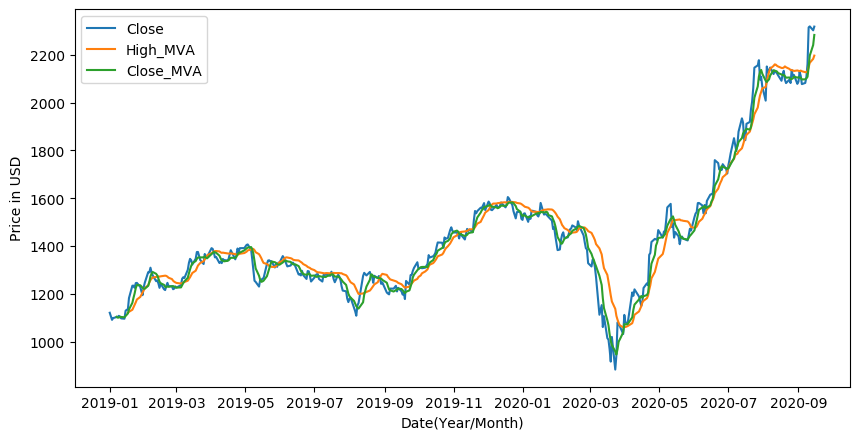

In [216]:
#visualise the data
plt.figure(figsize=(10,5),dpi=100)
#plt.figure(figsize = (20,10))
plt.plot(df['Close'] ,label = 'Close')
plt.plot(df['High_MVA'],label = 'High_MVA')
plt.plot(df['Close_MVA'],label = 'Close_MVA')
plt.legend(loc = 'upper left')

plt.ylabel("Price in USD")
plt.xlabel('Date(Year/Month)')
plt.show()


In [217]:
#Creating Flag
def buy_sell(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1  
    
    for i in range(len(data)):
        
        if data['Close_MVA'][i] > data['High_MVA'][i]:
            
            if flag != 1:
                
                sigPriceBuy.append(data['Close'][i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['Close_MVA'][i] < data["High_MVA"][i]:
            
            if flag != 0:
                
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['Close'][i])
                flag = 0
            else:
                
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
            
    return(sigPriceBuy,sigPriceSell)

In [218]:
#store the buy and sell data intro a variable

buy_sell = buy_sell(df)

df['Buy_Signal_Price'] = buy_sell[0]
#df['Sell_Signal_Price'] = buy_sell[1]

In [221]:
#Show the data
df['Buy_Signal_Price'].sample(10)

Date
2019-07-29        NaN
2019-11-27        NaN
2019-10-29        NaN
2019-11-15        NaN
2020-05-14        NaN
2020-02-14    1486.65
2020-06-24        NaN
2019-09-05        NaN
2019-11-20        NaN
2019-01-21        NaN
Name: Buy_Signal_Price, dtype: float64

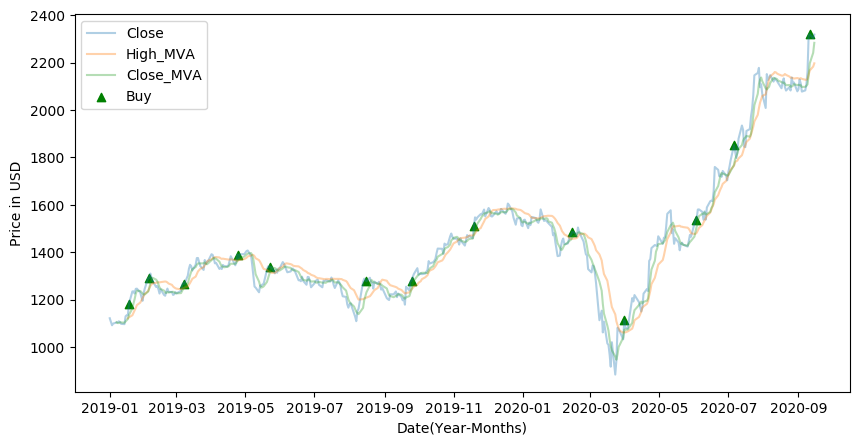

In [222]:
#visualise the data
#plt.figure(figsize = (20,10))

plt.figure(figsize=(10,5),dpi=100)

plt.plot(df['Close'] ,label = 'Close',alpha = 0.35)
plt.plot(df['High_MVA'],label = 'High_MVA',alpha = 0.35)
plt.plot(df['Close_MVA'],label = 'Close_MVA' ,alpha = 0.35)
plt.scatter(df.index,df['Buy_Signal_Price'],label = 'Buy',marker = '^',color = 'green')
#plt.scatter(df.index,df['Sell_Signal_Price'],label = 'Sell',marker = 'v',color = 'red')

plt.legend(loc = 'upper left')

plt.ylabel("Price in USD")
plt.xlabel('Date(Year-Months)')
plt.show()

